In [1]:
import pandas as pd  
import matplotlib.pyplot as plt # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.preprocessing.text import Tokenizer



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from keras.layers import LSTM, Dense, Dropout, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow.python.keras.models import Sequential
from keras.layers import SpatialDropout1D
from mlxtend.plotting import plot_confusion_matrix

In [2]:
malware_calls_df = pd.read_csv("calls.zip", compression="zip",
                               sep="\t", names=["API_Calls"])

malware_labels_df = pd.read_csv("types.zip", compression="zip",
                                sep="\t", names=["API_Labels"])

malware_calls_df["API_Labels"] = malware_labels_df.API_Labels
malware_calls_df["API_Calls"] = malware_calls_df.API_Calls.apply(lambda x: " ".join(x.split(",")))

malware_calls_df["API_Labels"] = malware_calls_df.API_Labels.apply(lambda x: 1 if x == "Virus" else 0)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


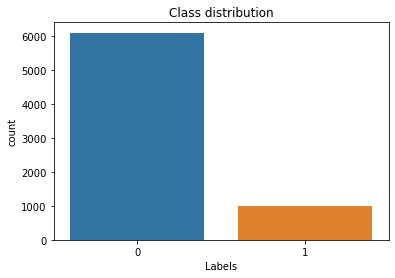

In [4]:
sns.countplot(malware_calls_df.API_Labels)
plt.xlabel('Labels')
plt.title('Class distribution')
plt.savefig("class_distribution.png")
plt.show()

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
max_words = 800
max_len = 100

X = malware_calls_df.API_Calls
Y = malware_calls_df.API_Labels.astype('category').cat.codes

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
print('Found %s unique tokens.' % len(tok.word_index))
X = tok.texts_to_sequences(X.values)
X = sequence.pad_sequences(X, maxlen=max_len)
print('Shape of data tensor:', X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.15)

le = LabelEncoder()
Y_train_enc = le.fit_transform(Y_train)
Y_train_enc = np_utils.to_categorical(Y_train_enc)

Y_test_enc = le.transform(Y_test)
Y_test_enc = np_utils.to_categorical(Y_test_enc)


In [ ]:

 
# define the LSTM model
def malware_model(act_func="softsign"):
    model = Sequential()
    model.add(Embedding(max_words, 300, input_length=max_len))
    model.add(SpatialDropout1D(0.1))
    model.add(LSTM(32, dropout=0.1, recurrent_dropout=0.1,
                   return_sequences=True, activation=act_func))
    model.add(LSTM(32, dropout=0.1, activation=act_func, return_sequences=True))
    model.add(LSTM(32, dropout=0.1, activation=act_func))
    model.add(Dense(128, activation=act_func))
    model.add(Dropout(0.1))
    model.add(Dense(256, activation=act_func))
    model.add(Dropout(0.1))
    model.add(Dense(128, activation=act_func))
    model.add(Dropout(0.1))
    model.add(Dense(1, name='out_layer', activation="linear"))
    return model

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input

In [ ]:
tf.Graph()

In [ ]:
tf.compat.v1.get_default_graph()

In [ ]:
import h5py
import numpy as np
import pandas as pd

In [ ]:
model = malware_model()
print(model.summary())
model.compile(loss='mse', optimizer="rmsprop",
              metrics=['accuracy'])

filepath = "lstm-malware-model.hdf5"
model.load_weights(filepath)

history = model.fit(X_train, Y_train, batch_size=1000, epochs=10,
                    validation_data=(X_test, Y_test), verbose=1)

In [ ]:
y_test_pred = model.predict_classes(X_test)
cm = confusion_matrix(Y_test, y_test_pred)

plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.savefig("confusion_matrix.png")
plt.show()